<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/SH22Hwang-patch-1/Jeongbogun/92lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [ ]:
train_images = train_images[:,:,:, np.newaxis]
test_images = test_images[:,:,:,np.newaxis]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (28,28,1),
                        kernel_size = (3,3), padding = 'same',
                        filters =32),
     keras.layers.MaxPooling2D((2,2), strides=2),
     keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                        filters=64),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation ='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels,
                    epochs=15, validation_split=0.25)

Epoch 1/15
1407/1407 [==============================] - 70s 49ms/step - loss: 0.6873 - accuracy: 0.8028 - val_loss: 0.4199 - val_accuracy: 0.8568
Epoch 2/15
1407/1407 [==============================] - 68s 48ms/step - loss: 0.3643 - accuracy: 0.8712 - val_loss: 0.3670 - val_accuracy: 0.8710
Epoch 3/15
1407/1407 [==============================] - 68s 49ms/step - loss: 0.3165 - accuracy: 0.8880 - val_loss: 0.3350 - val_accuracy: 0.8841
Epoch 4/15
1407/1407 [==============================] - 68s 49ms/step - loss: 0.2927 - accuracy: 0.8972 - val_loss: 0.3071 - val_accuracy: 0.8935
Epoch 5/15
1407/1407 [==============================] - 68s 48ms/step - loss: 0.3446 - accuracy: 0.8854 - val_loss: 0.3042 - val_accuracy: 0.8974
Epoch 6/15
1407/1407 [==============================] - 68s 48ms/step - loss: 0.2438 - accuracy: 0.9130 - val_loss: 0.3557 - val_accuracy: 0.8777
Epoch 7/15
1407/1407 [==============================] - 68s 48ms/step - loss: 0.2570 - accuracy: 0.9087 - val_loss: 0.3070 -

AttributeError: ignored

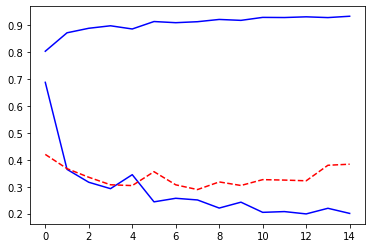

In [ ]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.hisotry['val_accuracy'], 'r--')


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

In [ ]:
randIdx = np.random.randint(0,1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)

[3 9 0 9 4 7 4 2 0 5 2 1 2 1 3 0 9 1 0 9 3 6 7 9 9]


In [ ]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1)//images_per_row +1
  fig, ax = plt.subplots(n_rows, images_per_row,
                         figsize = (images_per_row *2, n_rows * 2))
  for i in range(n_rows):
    for j in range(images_per_row):
      if i*images_per_row + j >= n_images : break
      img_idx= i* images_per_row +j
      a_image = images[img_idx].reshape(28,28)
      if n_rows>1: axis = ax[i,j]
      else: axis = ax[j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      label = class_names[labels[img_idx]]
      axis.set_title(label)
      axis.imshow(a_image, cmap='gray', interpolation='nearest')

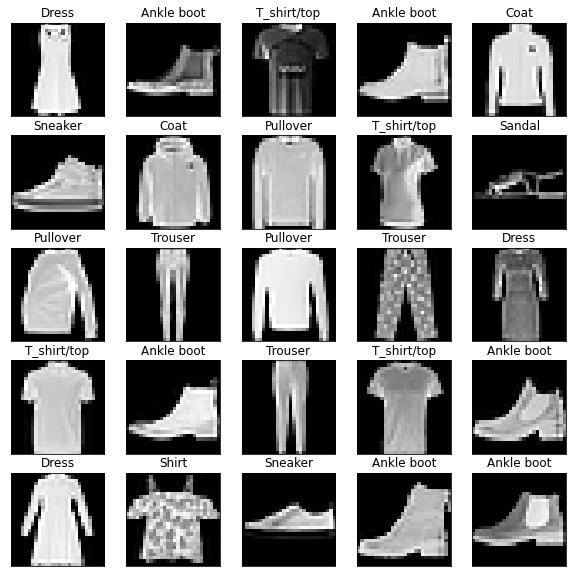

In [ ]:
plot_images(images, predictions, images_per_row=5)

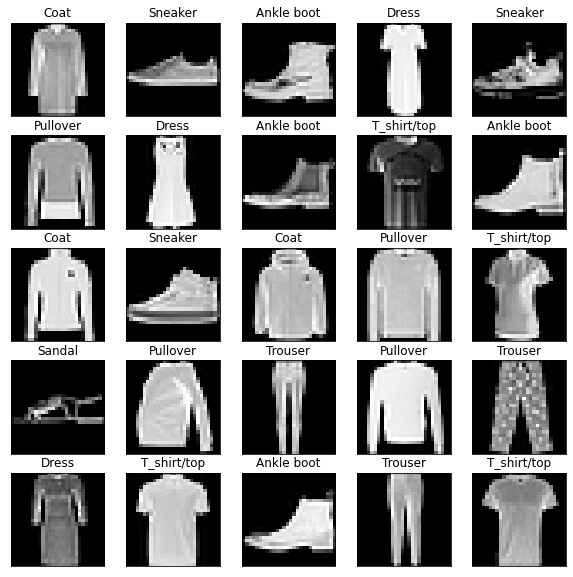

In [ ]:
randIdx = np.random.randint(0,1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row=5)